In [2]:
from sklearn.datasets import make_friedman1

In [3]:
x,y = make_friedman1()

In [4]:
import pandas as pd

In [5]:
x_df = pd.DataFrame(x)

In [6]:
x_df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.419417,0.094480,0.551824,0.221031,0.639838,0.486079,0.141831,0.182149,0.300964,0.440658
1,0.053390,0.024010,0.754057,0.972055,0.891404,0.661740,0.451501,0.588290,0.919716,0.149397
2,0.754947,0.901284,0.618106,0.133619,0.123862,0.026941,0.592235,0.556535,0.826708,0.930252
3,0.477603,0.635169,0.248807,0.658477,0.955149,0.108124,0.081305,0.150781,0.635647,0.650569
4,0.036920,0.405714,0.918673,0.547837,0.241160,0.322382,0.430548,0.498390,0.692747,0.033028


In [7]:
corr_ = x_df.corr()
print(corr_)


          0         1         2         3         4         5         6  \
0  1.000000 -0.109046 -0.050040  0.176895  0.115760  0.080928 -0.086729   
1 -0.109046  1.000000 -0.106134 -0.113118 -0.098286 -0.037627 -0.103144   
2 -0.050040 -0.106134  1.000000  0.072905 -0.056472  0.118160  0.004008   
3  0.176895 -0.113118  0.072905  1.000000  0.167185  0.051807 -0.000798   
4  0.115760 -0.098286 -0.056472  0.167185  1.000000  0.087914  0.119229   
5  0.080928 -0.037627  0.118160  0.051807  0.087914  1.000000 -0.177821   
6 -0.086729 -0.103144  0.004008 -0.000798  0.119229 -0.177821  1.000000   
7 -0.045623 -0.064677  0.151858 -0.020098  0.062264  0.149137 -0.016606   
8 -0.093832  0.036193  0.139456 -0.034003 -0.112240 -0.163526  0.049300   
9  0.015849  0.009381  0.019234 -0.153133 -0.004698 -0.184849  0.047531   

          7         8         9  
0 -0.045623 -0.093832  0.015849  
1 -0.064677  0.036193  0.009381  
2  0.151858  0.139456  0.019234  
3 -0.020098 -0.034003 -0.153133  
4  0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

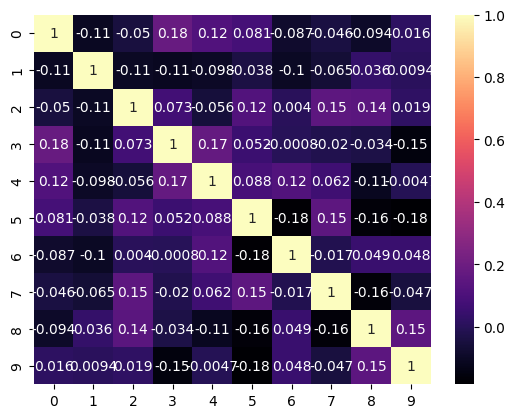

In [9]:
sns.heatmap(corr_,annot=True,cmap="magma")
plt.show()

In [10]:
# features are not correlated to each other  this leads to more information loss

In [11]:
from sklearn.decomposition import PCA

In [12]:
# we will not able to visualise data point of previous x_df datapoints so we reduce the dimenstion using pca and make it in 3 dim to visualise it but it lead more information loss which is may be important if features are highly co-related the loss will be minimum and if the features are les correlated then the loss is more 

In [13]:
pca = PCA(n_components=3)
pca.fit(x_df)
x_3dim = pca.transform(x_df)
# it return numpy array

In [14]:
x_df_3dim = pd.DataFrame(x_3dim)
x_df_3dim.head(5)

,0,1,2
0,0.048685,-0.151262,-0.230907
1,0.367216,-0.041930,0.550783
2,-0.701014,0.060920,-0.134601
3,-0.061373,0.322789,-0.471952
4,-0.166650,-0.430797,0.317092


In [20]:
import plotly.express as px
fig = px.scatter_3d(x=x_df_3dim.iloc[:,0],y=x_df_3dim.iloc[:,1],z=x_df_3dim.iloc[:,2],title="extracted information or variances")
fig.show()


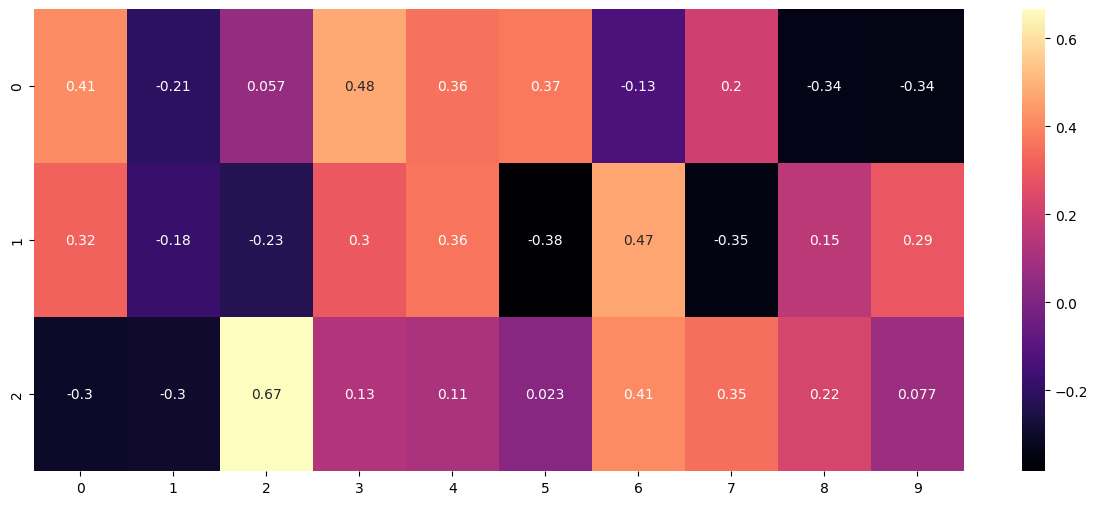

In [25]:
plt.figure(figsize=(15,6))
pca_components = pca.components_
sns.heatmap(pca_components,annot=True,cmap='magma')
plt.show()

In [28]:
pca_exp_variance = pca.explained_variance_ratio_.round(4)
print("component-wise explained variance: \n",pca_exp_variance)

component-wise explained variance: 
 [0.163  0.1313 0.1235]


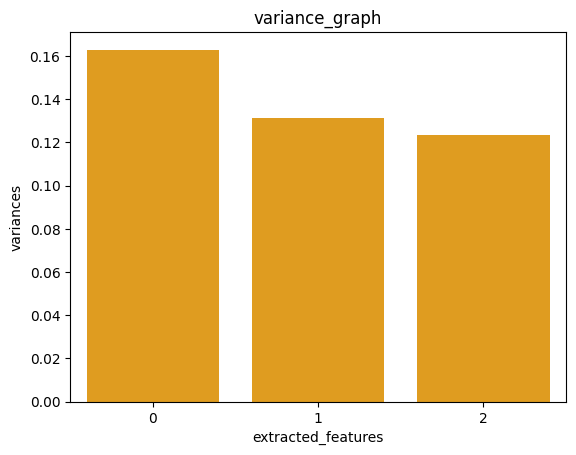

In [33]:
sns.barplot(pca_exp_variance,color='orange')
plt.title("variance_graph")
plt.xlabel("extracted_features")
plt.ylabel("variances")
plt.show()